### can be done using apriori algorithm

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import networkx as nx
import random
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
read_df = pd.read_csv('transaction_data.csv')
df = read_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


## Data cleaning (taken from assignment-1 that was submitted before)

In [4]:
df = df[df.UserId>0] # usedid <=0 : 25%
df = df[df.ItemCode>0]
df = df[df.NumberOfItemsPurchased>0]
df = df[df.CostPerItem>0]
df = df[df.ItemDescription.notna()]
df = df[df.TransactionTime.str[-4:] != '2028']

In [5]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.730,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.520,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.900,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.730,United Kingdom
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.520,United Kingdom


## No. of transactions in each month

In [6]:
df.TransactionTime = pd.to_datetime(df.TransactionTime)

In [26]:
df['month_year'] = pd.to_datetime(df.TransactionTime).dt.to_period('M')

/home/gokul/.local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790726 entries, 958864 to 0
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype                                
---  ------                  --------------   -----                                
 0   UserId                  790726 non-null  int64                                
 1   TransactionId           790726 non-null  int64                                
 2   TransactionTime         790726 non-null  datetime64[ns, pytz.FixedOffset(330)]
 3   ItemCode                790726 non-null  int64                                
 4   ItemDescription         790726 non-null  object                               
 5   NumberOfItemsPurchased  790726 non-null  int64                                
 6   CostPerItem             790726 non-null  float64                              
 7   Country                 790726 non-null  object                               
 8   month_year              790726 non-null  per

In [28]:
df.sort_values(by = ['month_year'], inplace = True)


In [29]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month_year,total_cost_item
958864,355845,5932399,2018-02-27 13:49:00+05:30,482286,GINGERBREAD MAN COOKIE CUTTER,36,1.730,United Kingdom,2018-02,62.280
855143,380289,5907506,2018-02-16 06:58:00+05:30,1732206,WOOD S/3 CABINET ANT WHITE FINISH,3,10.980,United Kingdom,2018-02,32.940
426991,335643,5900906,2018-02-12 08:15:00+05:30,212793,COLOURING PENCILS BROWN TUBE,15,1.180,United Kingdom,2018-02,17.700
1078025,326970,5922081,2018-02-23 07:07:00+05:30,451101,FAWN BLUE HOT WATER BOTTLE,6,4.080,United Kingdom,2018-02,24.480
256729,351162,5916350,2018-02-19 11:38:00+05:30,455175,BUTTERFLIES STICKERS,36,1.180,United Kingdom,2018-02,42.480


In [30]:
Ser = df.groupby('month_year').TransactionId.nunique()
Ser

month_year
2018-02    1198
2018-03     629
2018-04    1041
2018-05    1157
2018-06    1365
2018-07    1399
2018-08    1405
2018-09    1273
2018-10    1361
2018-11    1350
2018-12    1994
2019-01    2360
2019-02    1802
Freq: M, Name: TransactionId, dtype: int64

Text(0, 0.5, 'No. of transactions')

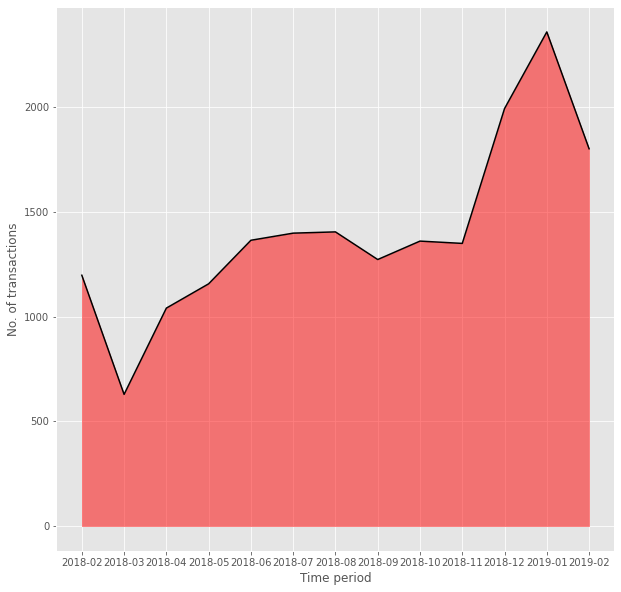

In [31]:
x = np.arange(0,len(Ser),1)
style.use('ggplot')
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.plot(x, Ser,  color = 'k')
ax1.fill_between(x, Ser, color = 'r', alpha = 0.5)
ax1.set_xticks(x)
ax1.set_xticklabels(Ser.index)
plt.xlabel('Time period')
plt.ylabel('No. of transactions')

## No of items in each transaction

In [13]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month_year
958864,355845,5932399,2018-02-27 13:49:00+05:30,482286,GINGERBREAD MAN COOKIE CUTTER,36,1.730,United Kingdom,2018-02
326946,333774,5909189,2018-02-16 10:06:00+05:30,480186,HAND WARMER SCOTTY DOG DESIGN,9,2.900,United Kingdom,2018-02
1014949,319074,5931640,2018-02-27 09:15:00+05:30,463554,6 RIBBONS SHIMMERING PINKS,72,0.580,United Kingdom,2018-02
915969,331968,5908694,2018-02-16 09:05:00+05:30,1787079,JUMBO BAG RED RETROSPOT,60,2.700,United Kingdom,2018-02
556809,345282,5925799,2018-02-25 06:46:00+05:30,464373,GREY HEART HOT WATER BOTTLE,3,5.180,United Kingdom,2018-02


In [14]:
Ser = df.groupby('TransactionId').ItemDescription.nunique()

In [15]:
Ser.describe()

count   18334.000
mean       21.014
std        23.839
min         1.000
25%         7.000
50%        15.000
75%        27.000
max       540.000
Name: ItemDescription, dtype: float64

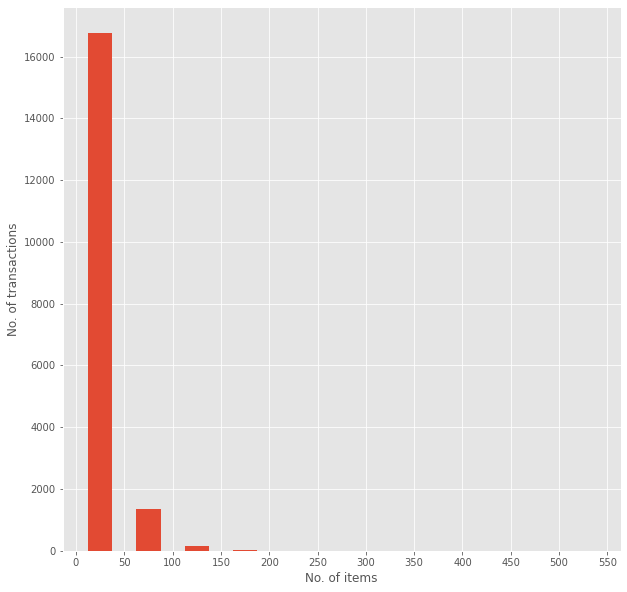

In [16]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

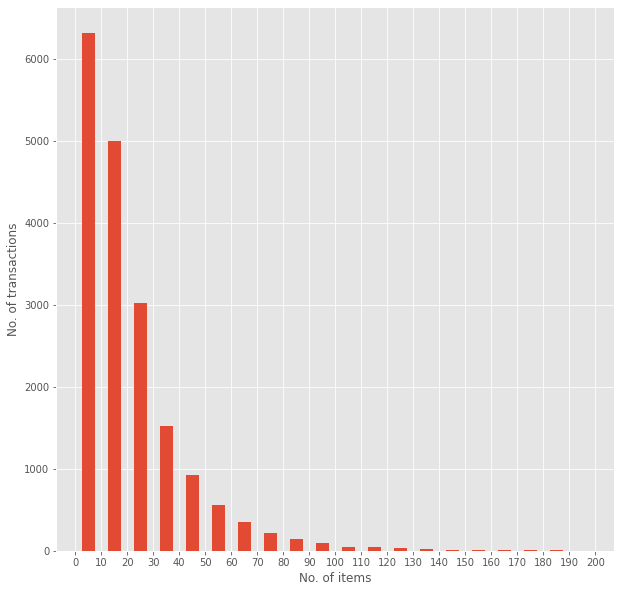

In [17]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

## items producing the most revenue

In [18]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month_year
958864,355845,5932399,2018-02-27 13:49:00+05:30,482286,GINGERBREAD MAN COOKIE CUTTER,36,1.730,United Kingdom,2018-02
326946,333774,5909189,2018-02-16 10:06:00+05:30,480186,HAND WARMER SCOTTY DOG DESIGN,9,2.900,United Kingdom,2018-02
1014949,319074,5931640,2018-02-27 09:15:00+05:30,463554,6 RIBBONS SHIMMERING PINKS,72,0.580,United Kingdom,2018-02
915969,331968,5908694,2018-02-16 09:05:00+05:30,1787079,JUMBO BAG RED RETROSPOT,60,2.700,United Kingdom,2018-02
556809,345282,5925799,2018-02-25 06:46:00+05:30,464373,GREY HEART HOT WATER BOTTLE,3,5.180,United Kingdom,2018-02


In [19]:
df['total_cost_item'] = df.NumberOfItemsPurchased*df.CostPerItem

In [20]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month_year,total_cost_item
958864,355845,5932399,2018-02-27 13:49:00+05:30,482286,GINGERBREAD MAN COOKIE CUTTER,36,1.730,United Kingdom,2018-02,62.280
326946,333774,5909189,2018-02-16 10:06:00+05:30,480186,HAND WARMER SCOTTY DOG DESIGN,9,2.900,United Kingdom,2018-02,26.100
1014949,319074,5931640,2018-02-27 09:15:00+05:30,463554,6 RIBBONS SHIMMERING PINKS,72,0.580,United Kingdom,2018-02,41.760
915969,331968,5908694,2018-02-16 09:05:00+05:30,1787079,JUMBO BAG RED RETROSPOT,60,2.700,United Kingdom,2018-02,162.000
556809,345282,5925799,2018-02-25 06:46:00+05:30,464373,GREY HEART HOT WATER BOTTLE,3,5.180,United Kingdom,2018-02,15.540


In [21]:
Ser = df.groupby('ItemDescription').total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)

In [22]:
Ser = Ser[:10]

In [23]:
Ser

ItemDescription
RETROSPOT LAMP                       81445586.760
PAPER CRAFT , LITTLE BIRDIE           1399593.600
REGENCY CAKESTAND 3 TIER              1171980.180
WHITE HANGING HEART T-LIGHT HOLDER     825642.240
JUMBO BAG RED RETROSPOT                703389.240
MEDIUM CERAMIC TOP STORAGE JAR         676376.700
PARTY BUNTING                          570567.180
ASSORTED COLOUR BIRD ORNAMENT          466747.560
RABBIT NIGHT LIGHT                     426722.280
CHILLI LIGHTS                          379393.200
Name: total_cost_item, dtype: float64

Text(0, 0.5, 'Item desc.')

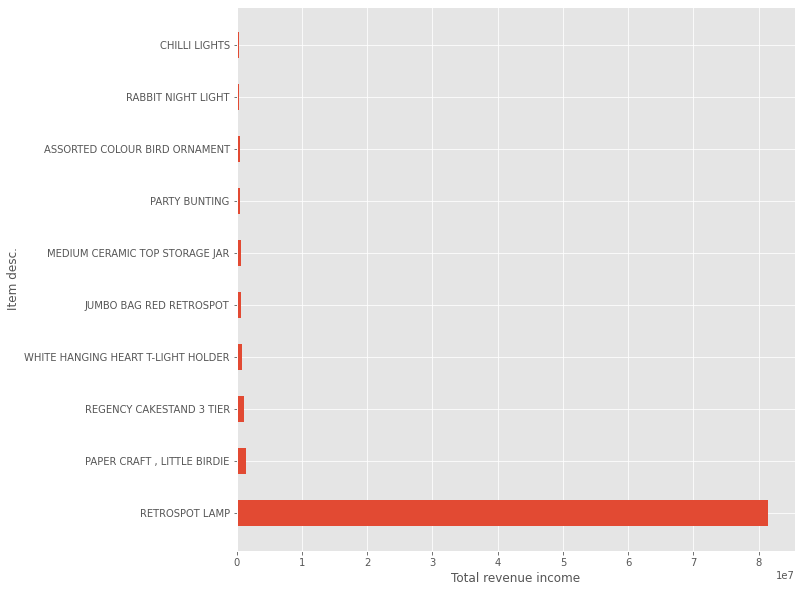

In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)
plt.xlabel('Total revenue income')
plt.ylabel('Item desc.')

In [106]:
df.ItemDescription.nunique()

3871

In [48]:
Ser = df.groupby('TransactionId').ItemDescription.unique().reset_index().set_index('TransactionId')

In [88]:
item_list = pd.DataFrame()
index = Ser.ItemDescription.index.to_list()
lists = Ser.ItemDescription.iloc[0]
item_list['index'] = index

In [89]:
item_list.head()

,index
0,5900015
1,5900026
2,5900037
3,5900048
4,5900059


In [91]:
item_list.loc[0,'0'] = lists[0]

In [93]:
item_list.loc[0,'1'] = lists[1]

In [120]:
item_list = pd.DataFrame()
item_list['TransactionId'] = index
for i in range(len(Ser.ItemDescription)):
    lists = Ser.ItemDescription.iloc[i]
    for j in range(len(lists)):
        item_list.loc[i, str(j)] = lists[j]

In [121]:
item_list.head()

,TransactionId,0,1,2,3,4,5,6,7,8,...,530,531,532,533,534,535,536,537,538,539
0,5900015,RED WOOLLY HOTTIE WHITE HEART.,CREAM CUPID HEARTS COAT HANGER,SET 7 BABUSHKA NESTING BOXES,KNITTED UNION FLAG HOT WATER BOTTLE,WHITE METAL LANTERN,GLASS STAR FROSTED T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5900026,HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5900037,BOX OF VINTAGE ALPHABET BLOCKS,BOX OF VINTAGE JIGSAW BLOCKS,IVORY KNITTED MUG COSY,POPPY'S PLAYHOUSE KITCHEN,ASSORTED COLOUR BIRD ORNAMENT,LOVE BUILDING BLOCK WORD,BOX OF 6 ASSORTED COLOUR TEASPOONS,HOME BUILDING BLOCK WORD,POPPY'S PLAYHOUSE BEDROOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5900048,BLUE COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,RED COAT RACK PARIS FASHION,JAM MAKING SET WITH JARS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5900059,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
item_list.set_index('TransactionId', inplace = True)

In [123]:
item_list.to_csv('Item_list.csv')

In [124]:
item_list.describe()

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
count,18334,17027,16312,15676,15039,14394,13801,13217,12631,12023,...,1,1,1,1,1,1,1,1,1,1
unique,2679,2588,2586,2549,2550,2513,2475,2480,2456,2416,...,1,1,1,1,1,1,1,1,1,1
top,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,...,BISCUIT TIN VINTAGE CHRISTMAS,FIRST CLASS PASSPORT COVER,TEA FOR ONE POLKADOT,BUNDLE OF 3 RETRO NOTE BOOKS,WOODLAND CHARLOTTE BAG,SCOTTIE DOGS BABY BIB,EGG FRYING PAN PINK,PINK POLKADOT BOWL,CREAM HEART CARD HOLDER,FLORAL FOLK STATIONERY SET
freq,149,119,126,95,85,102,86,85,70,65,...,1,1,1,1,1,1,1,1,1,1


## rearranging the cells so that the transaction id is set as index and the item descriptions are set as the column names with one-hot encoding done for the data-points

In [127]:
df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')

In [128]:
df_set.head()

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5900026,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5900037,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5900048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5900059,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [129]:
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1
df_set = df_set.applymap(encode)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## applying apriori algorithm

In [243]:
frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)

In [248]:
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]

In [235]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 339 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   452 non-null    float64
 1   itemsets  452 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [236]:
top_items = frequent_itemsets[:10]

In [251]:
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))

/home/gokul/.local/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [252]:
top_items

,support,itemsets
339,0.107,['WHITE HANGING HEART T-LIGHT HOLDER']
250,0.093,['REGENCY CAKESTAND 3 TIER']
140,0.087,['JUMBO BAG RED RETROSPOT']
205,0.075,['PARTY BUNTING']
21,0.075,['ASSORTED COLOUR BIRD ORNAMENT']
166,0.070,['LUNCH BAG RED RETROSPOT']
278,0.063,['SET OF 3 CAKE TINS PANTRY DESIGN ']
158,0.057,['LUNCH BAG BLACK SKULL.']
195,0.056,['PACK OF 72 RETROSPOT CAKE CASES']
312,0.055,['SPOTTY BUNTING']


Text(0, 0.5, 'Support')

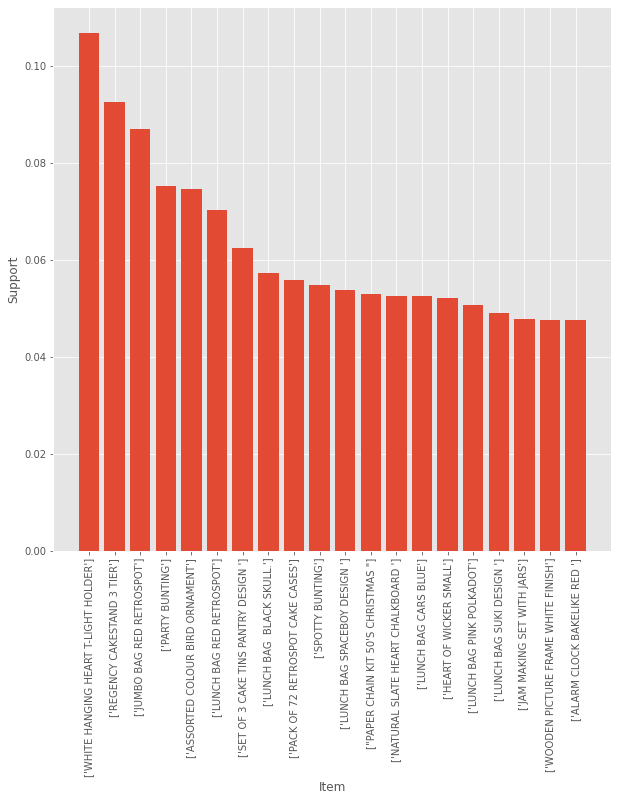

In [253]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

## setting rules to further filter the frequent_set

In [272]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)

In [273]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.036,0.036,0.015,0.427,11.715,0.014,1.683
1,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.036,0.036,0.015,0.419,11.715,0.014,1.658
2,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.056,0.036,0.018,0.322,9.002,0.016,1.421
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.036,0.056,0.018,0.502,9.002,0.016,1.897
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.043,0.033,0.019,0.433,13.018,0.017,1.705
...,...,...,...,...,...,...,...,...,...
182,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT)",(LUNCH BAG PINK POLKADOT),0.025,0.051,0.015,0.609,11.996,0.014,2.429
183,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)",(LUNCH BAG RED RETROSPOT),0.023,0.070,0.015,0.653,9.308,0.014,2.683
184,(LUNCH BAG RED RETROSPOT),"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)",0.070,0.023,0.015,0.217,9.308,0.014,1.247
185,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT)",0.051,0.025,0.015,0.300,11.996,0.014,1.392


In [274]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,187.000,187.000,187.000,187.000,187.000,187.000,187.000
mean,0.047,0.049,0.020,0.456,10.436,0.017,1.957
std,0.016,0.019,0.004,0.144,5.143,0.004,0.942
min,0.020,0.020,0.015,0.202,1.894,0.007,1.120
25%,0.036,0.037,0.017,0.356,7.076,0.015,1.472
50%,0.045,0.047,0.019,0.423,8.711,0.016,1.655
75%,0.053,0.054,0.023,0.551,13.018,0.020,2.062
max,0.107,0.107,0.030,0.894,29.212,0.028,9.121


In [284]:
top_rules = rules.sort_values('confidence', ascending = False)[:10]

In [285]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
164,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.024,0.038,0.021,0.894,23.733,0.020,9.121
166,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.025,0.043,0.021,0.848,19.877,0.020,6.291
172,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.020,0.043,0.017,0.834,19.558,0.016,5.775
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030,0.038,0.025,0.827,21.951,0.024,5.573
146,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030,0.043,0.024,0.784,18.385,0.022,4.436
29,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.038,0.043,0.030,0.783,18.356,0.028,4.410
170,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",(GREEN REGENCY TEACUP AND SAUCER),0.023,0.038,0.017,0.745,19.757,0.016,3.768
163,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.024,0.025,0.017,0.736,29.212,0.017,3.694
13,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT ),0.023,0.047,0.017,0.733,15.747,0.016,3.577
23,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.035,0.041,0.025,0.729,17.682,0.024,3.540


Text(0, 0.5, 'Confidence')

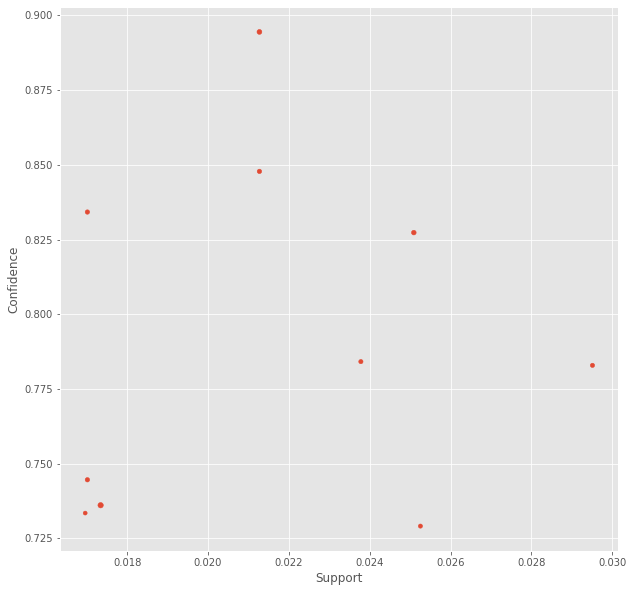

In [287]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)
plt.xlabel('Support')
plt.ylabel('Confidence')

In [479]:
G1 = nx.DiGraph()

In [480]:
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19']
    

In [481]:
len(colors)

50

In [482]:
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
        

In [483]:
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
        

In [484]:
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)

In [464]:
colors.reshape(1)

AttributeError: 'list' object has no attribute 'reshape'

{'r': Text(0.5227902043675083, -0.6962633378302729, 'r'),
 '0': Text(0.17235769856592265, -0.8674829339559671, '0'),
 'ROSES REGENCY TEACUP AND SAUCER ': Text(-0.9178411051433881, 0.16269614147946526, 'ROSES REGENCY TEACUP AND SAUCER '),
 'r0': Text(0.8129066260172008, 0.7359527379376931, 'r0'),
 'PINK REGENCY TEACUP AND SAUCER': Text(0.6485773055623436, -0.550296377837391, 'PINK REGENCY TEACUP AND SAUCER'),
 'GREEN REGENCY TEACUP AND SAUCER': Text(-0.06078108478100548, 0.9926271038513839, 'GREEN REGENCY TEACUP AND SAUCER'),
 '1': Text(-0.4099362955581364, -0.8106572337562856, '1'),
 'r1': Text(0.9070790982128992, 0.11191597321737945, 'r1'),
 '2': Text(-0.6277631734072623, 0.7882411555883218, '2'),
 'REGENCY CAKESTAND 3 TIER': Text(-0.029800102107259797, -0.9299999999999999, 'REGENCY CAKESTAND 3 TIER'),
 'r2': Text(-0.680500502468906, -0.5704920127838937, 'r2'),
 '3': Text(0.8224098478609655, -0.23492130117679333, '3'),
 'r3': Text(-0.9105813154510678, -0.28798833953614267, 'r3'),
 '4'

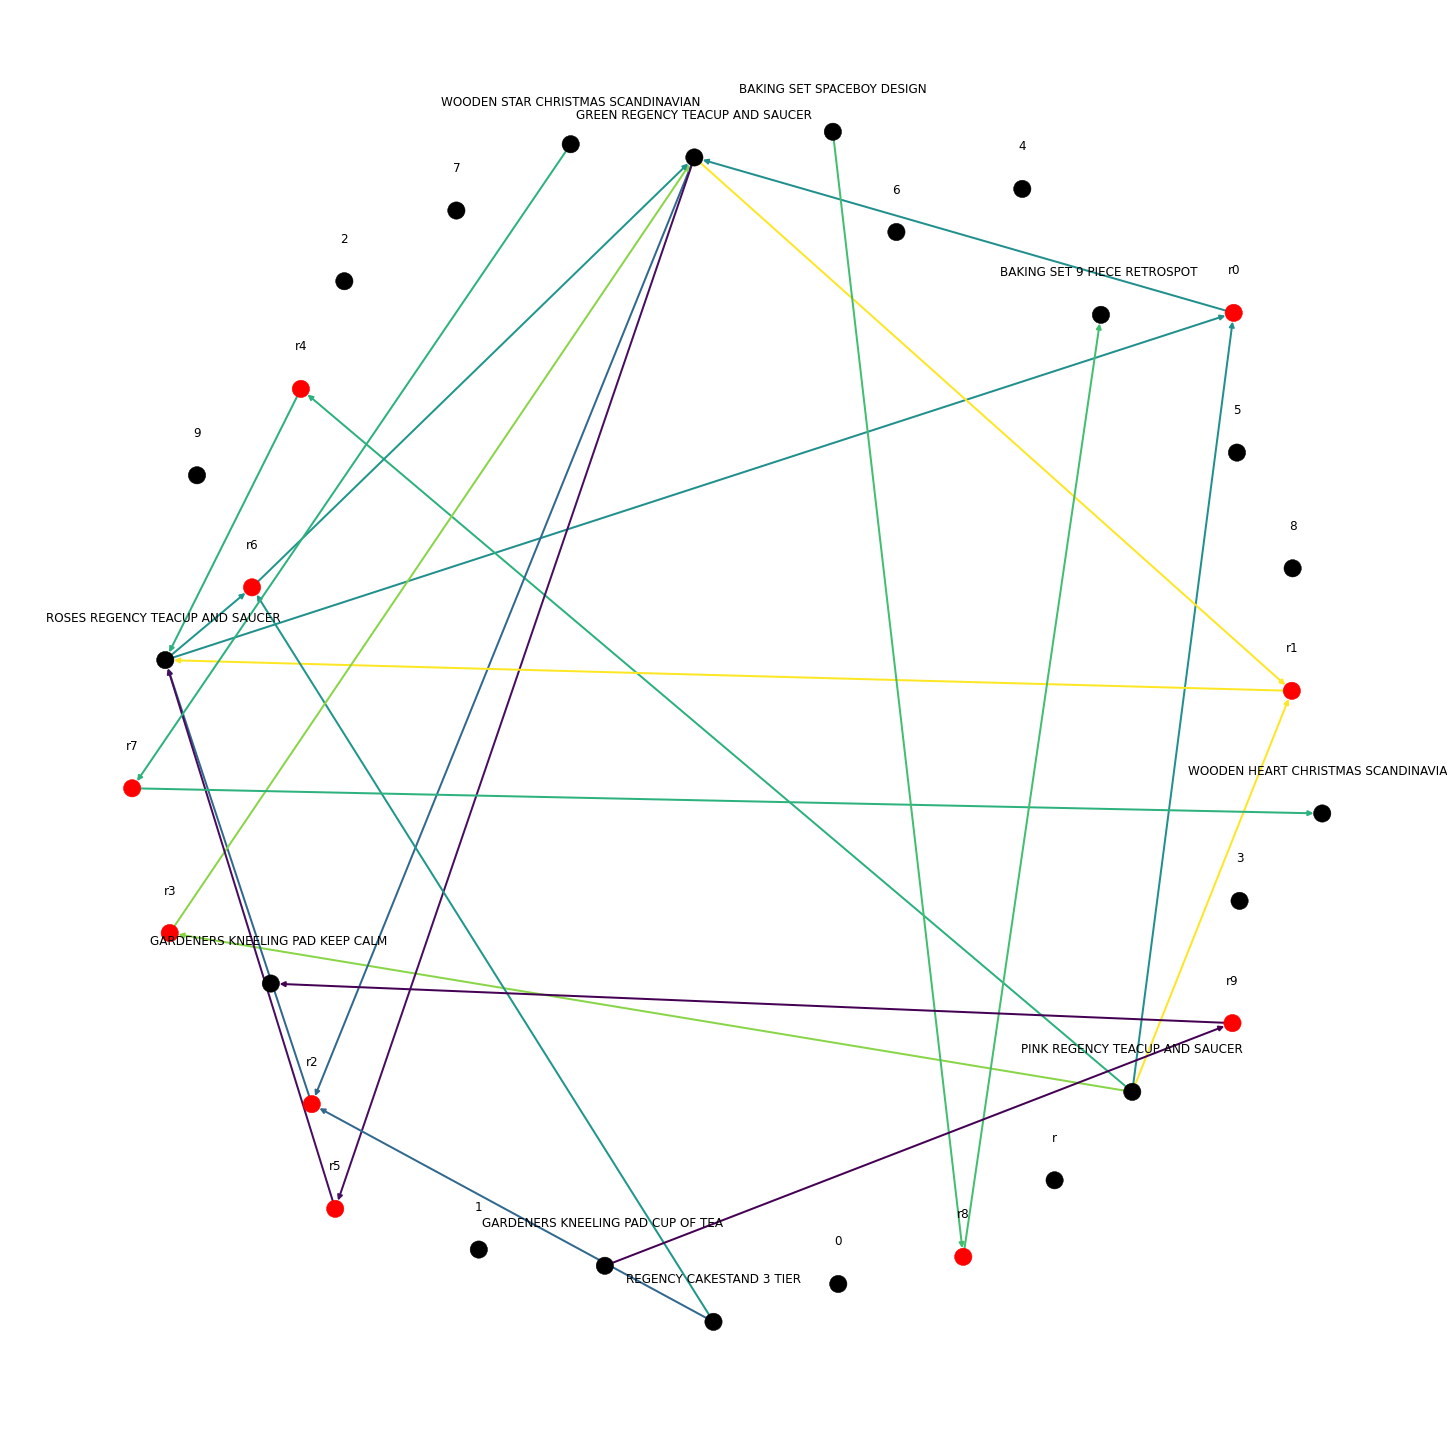

In [485]:

fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

ValueError: 'c' argument has 200 elements, which is inconsistent with 'x' and 'y' with size 20.

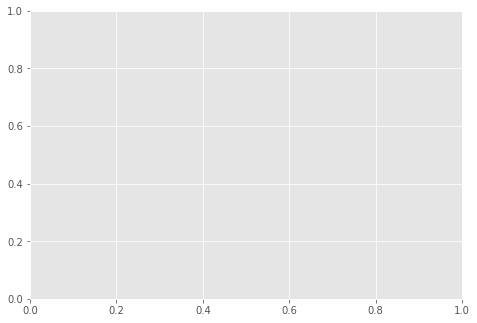

In [443]:
G1 = nx.DiGraph()
   
color_map=[]
N = 50
colors = np.random.rand(N)    
strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']   
   
   
for i in range (10):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in top_rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in top_rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
for node in G1:
    found_a_string = False
    for item in strs: 
        if node==item:
            found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
 
pos = nx.spring_layout(G1, k=16, scale=1)
nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)
plt.show()

In [ ]:
rules[(rules.lift >= 9.388) & (rules.confidence >= 0.429)]